# Trabalho INF1032 - Ciência de Dados

## Grupo: Guilherme Vassallo e Rodrigo V. Cortezi

### Base de dados: TMDB 5000 Movie Dataset, no Kaggle.
#### https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

### Nosso objetivo é utilizar essa base de dados e a Ciência de Dados para descobrir informações interessantes e valiosas sobre o universo dos filmes.

## Ideias gerais:

-Descobrir quanto cada filme faturou ✔

-Descobrir filmes que mais faturaram ✔

-Descobrir filmes que menos faturaram ✔

-Quantos filmes tiveram prejuízo (e a porcentagem)

-Descobrir se existe relação entre a recepção do público e o faturamento, retorno ou orçamento

-Entender como o orçamento afeta a receita

-Descobrir quais produtoras tiveram mais sucesso (maior número de obras lançadas e 
maior retorno financeiro).

### Ideia de levantamento de dados temática: Vampiros vs lobisomens

-Extrair filmes de vampiro

-Extrair filmes de lobisomem
    
-Descobrir quanto filmes de vampiro arrecadaram no total

-Descobrir quanto filmes de lobisomem arrecadam no total

-Comparar quanto filmes de lobisomem e de vampiro arrecadam em média

-Quantos filmes de lobisomem e de vampiros existem na tabela

-Chance de um filme de lobisomem ou de vampiro ter prejuízo

-Descobrir como (e se) a rentabilidade e a recepção de filmes de lobisomem e vampiro alterou com o tempo
(no passado filmes de lobisomem faturavam mais ou eram mais bem recebidos?)

### Melhorar:

-Estrutura e legibilidade dos gráficos

-Excluir campos desnecessários da tabela?

## Exibindo base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Calculando lucro dos filmes (retorno - orçamento)

**Dados utilizados**

**Budget**: orçamento do filme em dólares americanos.

**Revenue**: receita do filme em dólares americanos.

In [10]:
movies["profit"] = movies["revenue"] - movies["budget"]

view = movies[["id", "original_title", "budget", "revenue", "profit"]]
view.head(30)

,id,original_title,budget,revenue,profit
0,19995,Avatar,237000000,2787965087,2550965087
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,661000000
2,206647,Spectre,245000000,880674609,635674609
3,49026,The Dark Knight Rises,250000000,1084939099,834939099
4,49529,John Carter,260000000,284139100,24139100
5,559,Spider-Man 3,258000000,890871626,632871626
6,38757,Tangled,260000000,591794936,331794936
7,99861,Avengers: Age of Ultron,280000000,1405403694,1125403694
8,767,Harry Potter and the Half-Blood Prince,250000000,933959197,683959197
9,209112,Batman v Superman: Dawn of Justice,250000000,873260194,623260194


## Quais filmes lucraram mais?

In [15]:
movies_sorted_profit = movies.sort_values(
    by = "profit",
    ascending = False)
top10 = movies_sorted_profit.head(10)
top10[["id", "original_title", "profit"]]

,id,original_title,profit
0,19995,Avatar,2550965087
25,597,Titanic,1645034188
28,135397,Jurassic World,1363528810
44,168259,Furious 7,1316249360
16,24428,The Avengers,1299557910
7,99861,Avengers: Age of Ultron,1125403694
124,109445,Frozen,1124219009
546,211672,Minions,1082730962
329,122,The Lord of the Rings: The Return of the King,1024888979
31,68721,Iron Man 3,1015439994


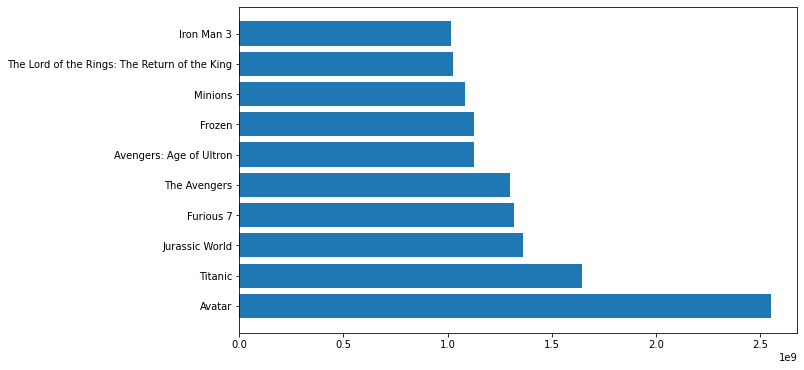

In [4]:
plt.figure(figsize=(10,6))
plt.barh('title', 'profit',data = movies_sorted_profit.head(10))
plt.savefig("movies_most_earned.png")

## Quais filmes tiveram mais prejuízo?

In [17]:
movies_with_loss = movies[movies.profit < 0]
movies_with_loss_sorted = movies_with_loss.sort_values(
    by = "profit",
    ascending = True)
top10 = movies_with_loss_sorted.head(10)
top10[["id", "original_title", "profit"]]

,id,original_title,profit
13,57201,The Lone Ranger,-165710090
135,7978,The Wolfman,-150000000
338,10733,The Alamo,-119180039
141,50321,Mars Needs Moms,-111007242
1652,14164,Dragonball Evolution,-100000000
208,1911,The 13th Warrior,-98301101
311,11692,The Adventures of Pluto Nash,-92896027
2638,19,Metropolis,-91969578
467,9822,Mighty Joe Young,-90000000
376,10357,Volcano,-90000000


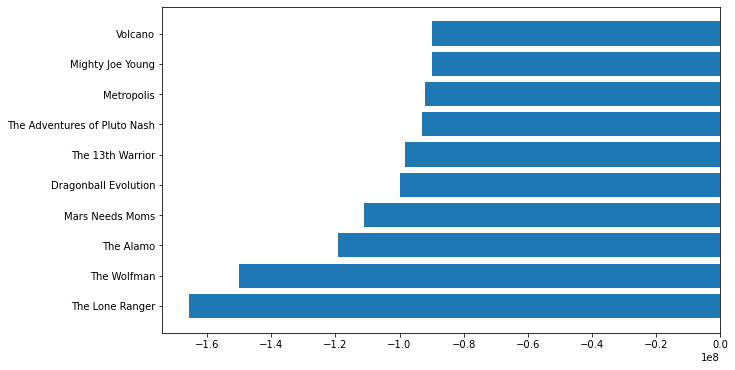

In [18]:
plt.figure(figsize=(10,6))
plt.barh('title', 'profit',data = movies_with_loss_sorted.head(10))
plt.savefig("movies_less_earned.png")

In [7]:
movies_lost_money = 

SyntaxError: invalid syntax (3897672724.py, line 1)